#**주차 수요 분석**
# 단계2 : 탐색적 데이터 분석

## 0.미션

* 미션4 : 이전 파일에서 생성한 base_data에 대해서 탐색적 분석을 수행합니다.
    * 단변량 분석
        * 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스를 파악합니다.
    * 이변량 분석
        * Target은 실차량수(숫자) 입니다.
        * 숫자형 feature --> 숫자형 Target 에 대해 전체 상관계수를 구해 확인합니다.
            * 상관계수가 높은 feature들에 대해 따로 산점도를 그려 확인합니다.
        * 범주형 feature --> 숫자형 Target
            * 평균 비교 barplot(sns.barplot)을 활용하여 비교합니다.
    * 전처리 추가
        * 범주형 feature 중에는 적은 수의 범주가 포함되어 있습니다. 가능한 범주끼리 묶어 봅시다.
    * 관계 정리하기

## 1.환경설정

* 세부 요구사항
    * 제공된 압축파일을 다운받아 압축을 풀고
    * anaconda의 root directory(보통 C:/Users/< ID > 에 project2 폴더를 만들고, 복사해 넣습니다.
    * 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 라이브러리 불러오기

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

### (2) 한글폰트 지정

In [9]:
import matplotlib.font_manager as fm

# 설치된 폰트
font_list = [font.name for font in fm.fontManager.ttflist]

# 맑은고딕이 있는지 확인
'Malgun Gothic' in font_list

True

In [10]:
plt.rcParams['font.family'] = 'Malgun Gothic'

### (3) 경로 설정

* project2 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [13]:
path = ''

### (4) 데이터 불러오기

* 단계1에서 저장한 파일을 불러 옵니다.
    * base_data.pkl

In [16]:
base_data = joblib.load(path+'result_df.pkl')

In [17]:
base_data.head()

단지코드  총세대수  지역  준공연도 건물형태    난방방식 승강기설치여부  실차량수       총면적  10_30  30_40  \
0  C0001    78  서울  2013  계단식  개별가스난방  전체동 설치   109   4393.14      0      0   
1  C0002    35  서울  2013  복도식  개별가스난방  전체동 설치    35    983.22     35      0   
2  C0003    88  서울  2013  계단식  개별가스난방  전체동 설치    88   5244.69      0      0   
3  C0004   477  서울  2014  복도식    지역난방  전체동 설치   943  34607.34      0      0   
4  C0006    15  서울  2013  복도식  개별가스난방  전체동 설치    21    309.50     15      0   

   40_50  50_60  over_60         임대보증금            임대료  
0      0     78        0  5.696200e+07  642930.000000  
1      0      0        0  6.306200e+07  470100.000000  
2      0     88        0  7.219000e+07  586540.000000  
3      0    150      327  1.015167e+08  950305.000000  
4      0      0        0  5.522750e+07  340148.333333

## 2.탐색적 데이터분석

* **세부 요구사항**
    * 기본 분석
        * 기초 통계량, NaN 값 확인 등 기본 분석을 수행합니다.
    * 단변량 분석
        - 단일 변수로 분석 : 등록차량수, 총세대수, 버스정류장수, 지하철역수, 공가수, 임대료, 보증금
        - 여러 변수를 묶어서 분석 : 건물구분, 공급유형
    * 이변량 분석
        - 전체 상관계수를 구하고 시각화 합니다.
        - 상관계수가 높은 변수에 대한 산점도를 구해봅니다.

### (1) 기본 분석

* **세부 요구사항**
    - 데이터프레임 전체에 대한 기초통계량을 구합니다.
    - NaN을 확인해 봅시다.

In [22]:
base_data.describe().T

count          mean           std      min           25%  \
총세대수     345.0  5.467594e+02  4.323595e+02     1.00  1.780000e+02   
준공연도     345.0  2.007548e+03  7.519637e+00  1970.00  2.002000e+03   
실차량수     345.0  5.554319e+02  3.746405e+02    21.00  2.580000e+02   
총면적      345.0  2.632487e+04  2.098324e+04    49.69  8.483260e+03   
10_30    345.0  4.583768e+01  1.611337e+02     0.00  0.000000e+00   
30_40    345.0  1.695130e+02  2.229351e+02     0.00  0.000000e+00   
40_50    345.0  1.474551e+02  2.166756e+02     0.00  0.000000e+00   
50_60    345.0  1.328899e+02  2.529471e+02     0.00  0.000000e+00   
over_60  345.0  5.326377e+01  1.779024e+02     0.00  0.000000e+00   
임대보증금    345.0  2.382737e+07  2.247481e+07     0.00  1.272491e+07   
임대료      345.0  1.977291e+05  1.587608e+05     0.00  1.129050e+05   

                 50%          75%           max  
총세대수          491.00       853.00  2.289000e+03  
준공연도         2008.00      2013.00  2.022000e+03  
실차량수          498.00       822.00  1.657000e+03  
총면적         23018.23     38910.14  1.128894e+05  
10_30           0.00         0.00  1.181000e+03  
30_40          68.00       298.00  1.429000e+03  
40_50           0.00       264.00  1.258000e+03  
50_60           0.00       150.00  1.444000e+03  
over_60         0.00         0.00  1.226000e+03  
임대보증금    19308500.00  28377000.00  1.898219e+08  
임대료        172000.00    227564.00  9.503050e+05

In [23]:
base_data.isna().sum()

단지코드        0
총세대수        0
지역          0
준공연도        0
건물형태        6
난방방식       26
승강기설치여부    23
실차량수        0
총면적         0
10_30       0
30_40       0
40_50       0
50_60       0
over_60     0
임대보증금       0
임대료         0
dtype: int64

### (2) 단변량 분석



* **세부 요구사항**
    - 주요 변수들의 분포를 살펴보며 비즈니스를 파악합시다.
    - 단일 변수로 분석
        * 대상 : 등록차량수, 총세대수, 버스정류장수, 지하철역수, 공가수, 임대료, 보증금
        * 도구 : 기초통계량, boxplot, histogram 을 통한 데이터 분포 파악
    - 여러 변수를 묶어서 분석 : 전용면적, 건물구분, 공급유형
        * pd.melt를 이용하여 pivot을 해제하고
        * sns.barplot으로 그래프를 그려서 비교해 봅시다.

## 단변량 함수

In [27]:
def eda_1_n(data, var, bins = 30) :
    # 기초 통계량
    display(data[[var]].describe().T)

    # 시각화
    plt.figure(figsize = (12,8))
    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

# 범주형 변수에 대한 단변량 분석 함수
def eda_1_c(data, var) :
    # 기초 통계량
    print(f' <<<  {var}   >>')
    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    temp = pd.DataFrame({'Class':cnt.index, 'Count':cnt.values, 'Prop':prop.values})
    display(temp)
    # 시각화
    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

In [28]:
result = joblib.load(path+'result_df.pkl')

## 지역별 실차량수 분석

In [30]:
car_region = result.groupby('지역', as_index = False)['실차량수'].sum()
car_region.T

0      1     2      3      4      5      6      7     8     9    10  \
지역      강원     경기    경남   광주전남   대구경북   대전충남   부산울산     서울    세종    전북   제주   
실차량수  4365  53946  7367  29023  27141  12576  24960  25785  1798  1921  922   

        11  
지역      충북  
실차량수  1820

In [31]:
area_region = result.groupby('지역', as_index=False)['총면적'].sum()
area_region.T

0             1            2             3             4   \
지역         강원            경기           경남          광주전남          대구경북   
총면적  220325.4  2530485.9698  372618.4364  1329781.5249  1072870.9109   

              5             6             7         8          9         10  \
지역          대전충남          부산울산            서울        세종         전북        제주   
총면적  747939.2168  1233469.9699  1223055.7916  78276.52  96891.151  56649.13   

            11  
지역          충북  
총면적  119716.85

In [32]:
car_area_region = pd.merge(car_region, area_region, how='left', on='지역')
car_area_region.T

0             1            2             3             4   \
지역          강원            경기           경남          광주전남          대구경북   
실차량수      4365         53946         7367         29023         27141   
총면적   220325.4  2530485.9698  372618.4364  1329781.5249  1072870.9109   

               5             6             7         8          9         10  \
지역           대전충남          부산울산            서울        세종         전북        제주   
실차량수        12576         24960         25785      1798       1921       922   
총면적   747939.2168  1233469.9699  1223055.7916  78276.52  96891.151  56649.13   

             11  
지역           충북  
실차량수       1820  
총면적   119716.85

In [33]:
car_area_region['차량당 총면적'] = car_area_region['총면적'] / car_area_region['실차량수']
car_area_region.T

0             1            2             3             4   \
지역              강원            경기           경남          광주전남          대구경북   
실차량수          4365         53946         7367         29023         27141   
총면적       220325.4  2530485.9698  372618.4364  1329781.5249  1072870.9109   
차량당 총면적  50.475464     46.907759      50.5794     45.818197     39.529528   

                  5             6             7          8          9   \
지역              대전충남          부산울산            서울         세종         전북   
실차량수           12576         24960         25785       1798       1921   
총면적      747939.2168  1233469.9699  1223055.7916   78276.52  96891.151   
차량당 총면적    59.473538     49.417867      47.43284  43.535328  50.437871   

                10         11  
지역              제주         충북  
실차량수           922       1820  
총면적       56649.13  119716.85  
차량당 총면적  61.441573  65.778489

In [34]:
resi_region = result.groupby('지역',  as_index = False)[['총세대수']].sum()
resi_region.T

0      1     2      3      4      5      6      7     8     9     10  \
지역      강원     경기    경남   광주전남   대구경북   대전충남   부산울산     서울    세종    전북    제주   
총세대수  4318  51102  7976  27773  22990  16736  25845  23849  2212  2248  1136   

        11  
지역      충북  
총세대수  2447

In [35]:
car_area_region = pd.merge(car_area_region, resi_region, how='left', on='지역')
car_area_region.T

0             1            2             3             4   \
지역              강원            경기           경남          광주전남          대구경북   
실차량수          4365         53946         7367         29023         27141   
총면적       220325.4  2530485.9698  372618.4364  1329781.5249  1072870.9109   
차량당 총면적  50.475464     46.907759      50.5794     45.818197     39.529528   
총세대수          4318         51102         7976         27773         22990   

                  5             6             7          8          9   \
지역              대전충남          부산울산            서울         세종         전북   
실차량수           12576         24960         25785       1798       1921   
총면적      747939.2168  1233469.9699  1223055.7916   78276.52  96891.151   
차량당 총면적    59.473538     49.417867      47.43284  43.535328  50.437871   
총세대수           16736         25845         23849       2212       2248   

                10         11  
지역              제주         충북  
실차량수           922       1820  
총면적       56649.13  119716.85  
차량당 총면적  61.441573  65.778489  
총세대수          1136       2447

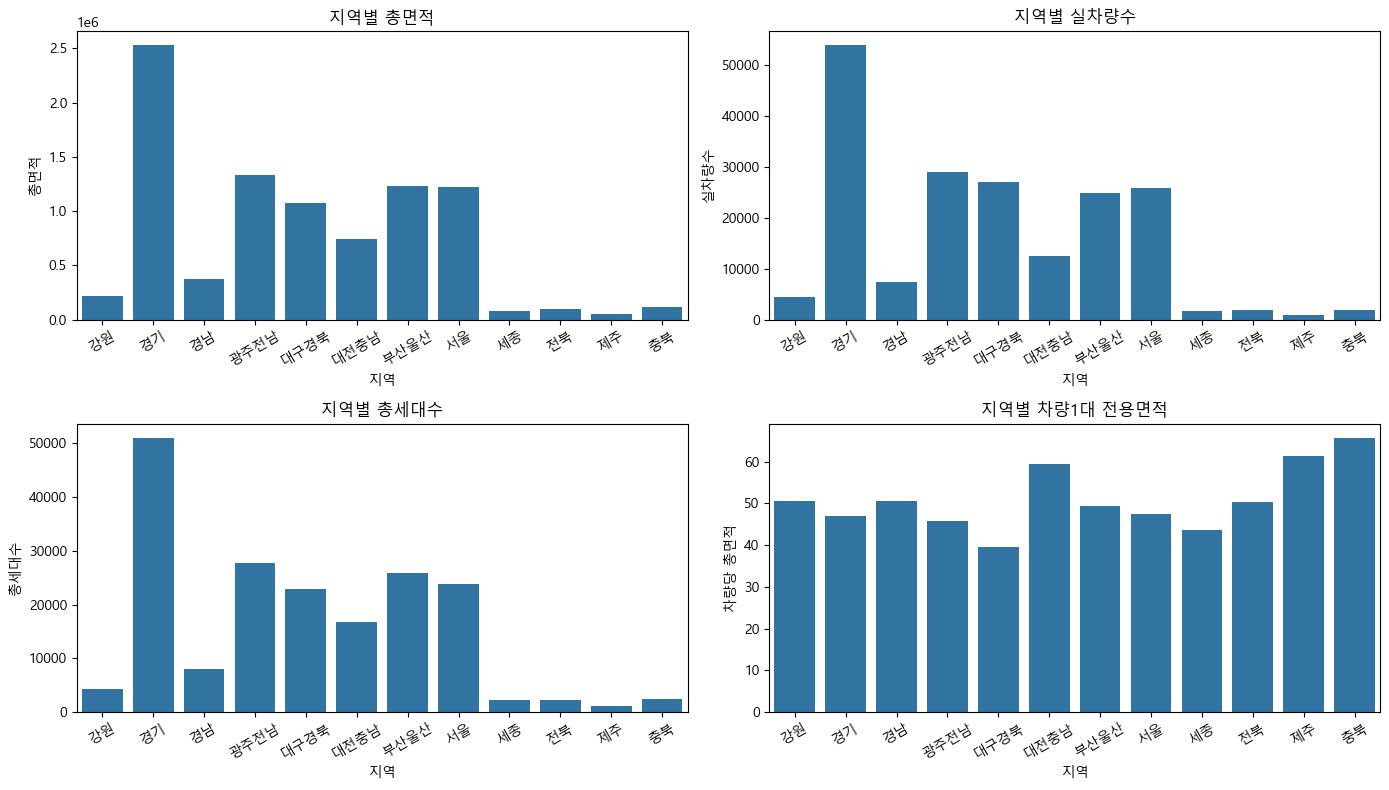

In [36]:
plt.figure(figsize = (14,8))
 
plt.subplot(2,2,1)
plt.title('지역별 총면적')
plt.xticks(rotation = 30)
sns.barplot(x = car_area_region['지역'], y = car_area_region['총면적'])
 
plt.subplot(2,2,2)
plt.title('지역별 실차량수')
plt.xticks(rotation = 30)
sns.barplot(x = car_area_region['지역'], y = car_area_region['실차량수'])
 
plt.subplot(2,2,3)
plt.title('지역별 총세대수')
plt.xticks(rotation = 30)
sns.barplot(x = car_area_region['지역'], y = car_area_region['총세대수'])
 
plt.subplot(2,2,4)
plt.title('지역별 차량1대 전용면적')
plt.xticks(rotation = 30)
sns.barplot(x = car_area_region['지역'], y = car_area_region['차량당 총면적'])
 
plt.tight_layout()
plt.show()

#### <결론> 상위 6개 지역 (경기, 부울, 광주전남, 서울, 대구경북, 대전충남)은 많은 세대수, 면적, 실차량수가 분포되있다.
#### 지역별 차량당 총면적의 차이가 존재할 것으로 예상된다. => 실차량수를 예측할 때 차량 1대 전용면적을 응용하여 예측한다면 성능이 더 좋아질 것으로 판단된다.

## 준공연도별 실차량수 분석

In [39]:
resi_year = result.groupby('준공연도',  as_index = False)[['총세대수']].sum()
resi_year.T

0     1     2     3     4     5     6     7     8     9   ...    22  \
준공연도  1970  1992  1993  1994  1995  1996  1997  1998  1999  2000  ...  2013   
총세대수   756   559  3167  4240  4891  4639  2513  3224  4204  1967  ...  7262   

        23    24    25    26    27    28    29    30    31  
준공연도  2014  2015  2016  2017  2018  2019  2020  2021  2022  
총세대수  4726  4337  9016  9179  8927   648  3630  1642   332  

[2 rows x 32 columns]

In [40]:
car_year = result.groupby('준공연도', as_index = False)['실차량수'].sum()
 
area_year = result.groupby('준공연도', as_index=False)['총면적'].sum()
 
car_area_year = pd.merge(car_year, area_year, how='left', on='준공연도')
 
car_area_year = pd.merge(car_area_year, resi_year, how='left', on='준공연도')
 
car_area_year['차량당 총면적'] = car_area_year['총면적'] / car_area_year['실차량수']

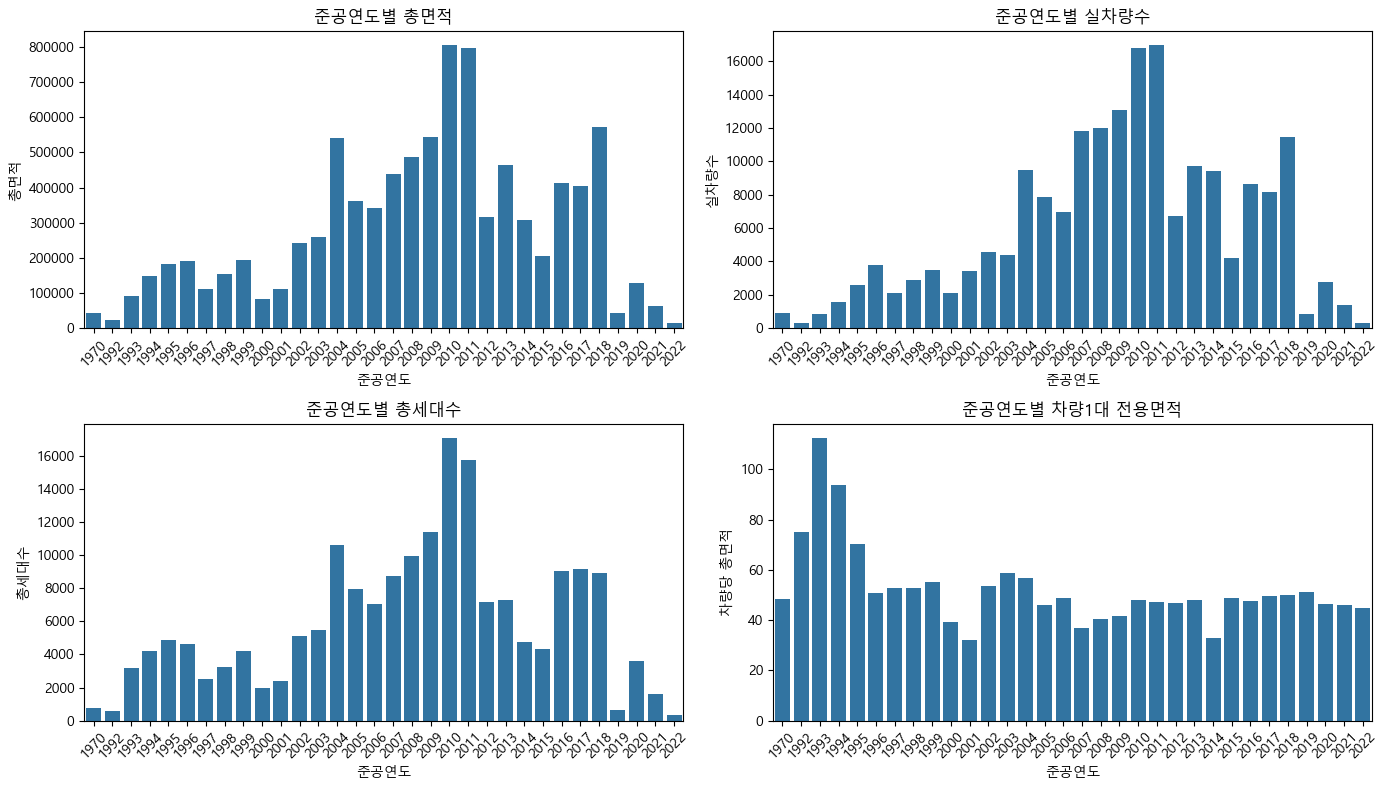

In [41]:
plt.figure(figsize = (14,8))
plt.subplot(2,2,1)
plt.title('준공연도별 총면적')
plt.xticks(rotation=45)
sns.barplot(x = car_area_year['준공연도'], y = car_area_year['총면적'])
plt.subplot(2,2,2)
plt.title('준공연도별 실차량수')
plt.xticks(rotation=45)
sns.barplot(x = car_area_year['준공연도'], y = car_area_year['실차량수'])
plt.subplot(2,2,3)
plt.title('준공연도별 총세대수')
plt.xticks(rotation=45)
sns.barplot(x = car_area_year['준공연도'], y = car_area_year['총세대수'])
plt.subplot(2,2,4)
plt.title('준공연도별 차량1대 전용면적')
plt.xticks(rotation=45)
sns.barplot(x = car_area_year['준공연도'], y = car_area_year['차량당 총면적'])
plt.tight_layout()
plt.show()

#### <결론> 준공연도에 따른 총세대수와 총면적이 증가하는 추세가 보인다. 그에 따라 실차량수또한 증가한다.
#### 하지만, 2018년도 이후의 data의 경우 해당 feature들이 현저히 줄어 들었다 따라서 추가적인 데이터 수집 필요할것 같다.

### (3) 이변량 분석

* **세부 요구사항**
    - 숫자형 feature --> target
        - 전체 변수들 간의 상관관계 구하기
            * 범주형 변수를 제외한 데이터셋을 이용하여
            * df.corr() + sns.heatmap() 으로 전체 상관계수를 시각화 합니다.
        - 등록차량수와 상관계수가 높은 상위 3~5개에 대해서 산점도를 그려 봅시다.
    - 범주형 feature --> target
        * 지역 : sns.barplot()으로 시각화 해 봅시다.

## 이변량 함수

In [46]:
def eda_2_nn(data, feature, target) :
    # 상관분석
    result = spst.pearsonr(temp[feature], temp[target])
    print(f'상관계수 : {result[0]}, P-value : {result[1]}')

    # 산점도
    temp = data.loc[data[feature].notnull()]
    sns.scatterplot( x= feature, y = target, data = temp)
    plt.grid()
    plt.show()


In [47]:
def eda_2_cn(data, feature, target) :

    # 가설검정
    # 범주의 수 확인
    cat = data[feature].unique()
    n = len(cat)

    # 범주가 2개
    if n == 2 :
        g0 = data.loc[data[feature] == cat[0], target]
        g1 = data.loc[data[feature] == cat[1], target]
        result = spst.ttest_ind(g0, g1)
    else :
        result = spst.f_oneway(*[data.loc[data[feature] == c, target] for c in cat])

    print(result)

    # 시각화 : 평균비교 막대그래프
    sns.barplot(x = feature, y = target, data = data)
    plt.grid()
    plt.show()

In [48]:
# 상호 상관계수 구하고 시각화 하기
def eda_2_corr(data, drop_vars, viz = 0):
    # 입력
    #     * 데이터프레임(data)
    #     * 불필요한 변수(drop_vars) : 리스트
    # 출력 :
    #     * viz = 0 : 히트맵만 출력
    #     * viz = 1 : 상관계수만 출력
    #     * 그외 : 상관계수 + 히트맵

    temp = data.drop(drop_vars,axis = 1).corr()
    mask = np.zeros_like(temp)
    mask[np.triu_indices_from(mask)] = True
    mask = np.where(mask == 1, 0, 1)
    result = mask * temp
    result = result[result != 0]

    if viz == 0 :
        plt.figure(figsize = (15,12))
        sns.heatmap(result, annot = True)
        plt.show()
    elif viz == 1 :
        display(result)
    else :
        display(result)
        plt.figure(figsize = (8,8))
        sns.heatmap(result, annot = True)
        plt.show()

#### 1) 전체 숫자형 변수들 간의 상관관계

C:\Users\User\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


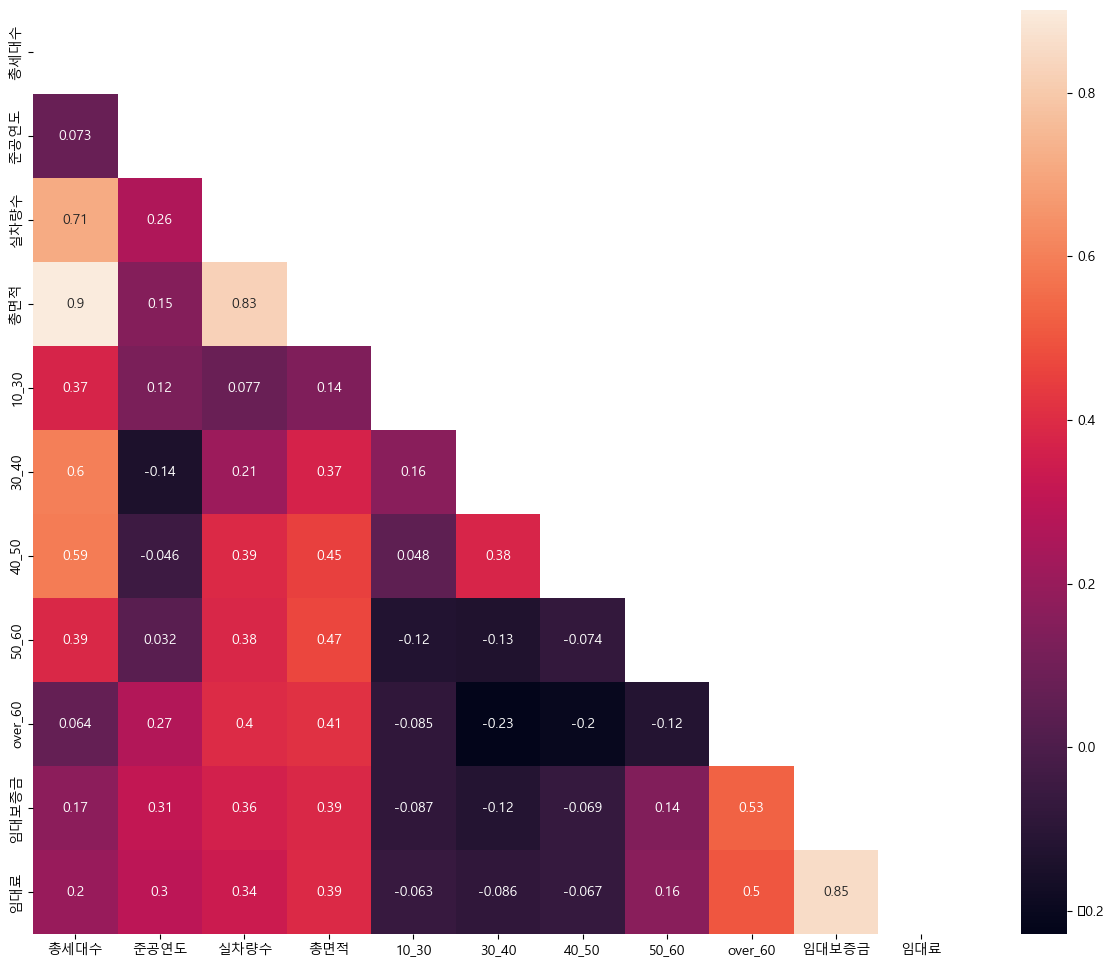

In [70]:
drop_vars= ['단지코드', '지역', '건물형태', '난방방식', '승강기설치여부']
eda_2_corr(base_data,drop_vars, viz = 0)

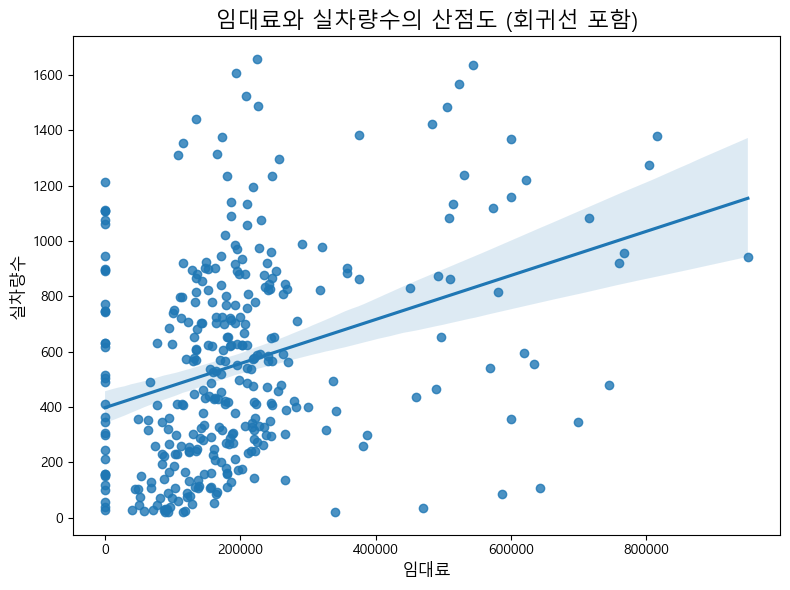

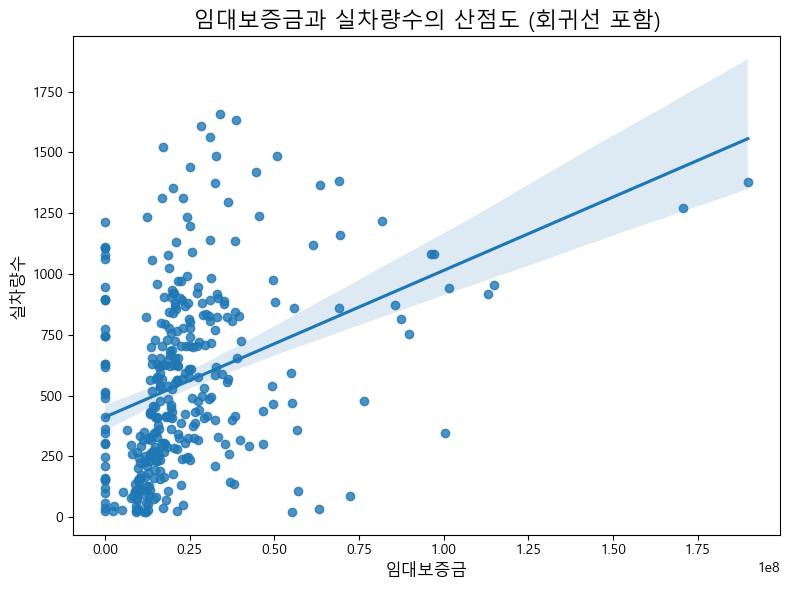

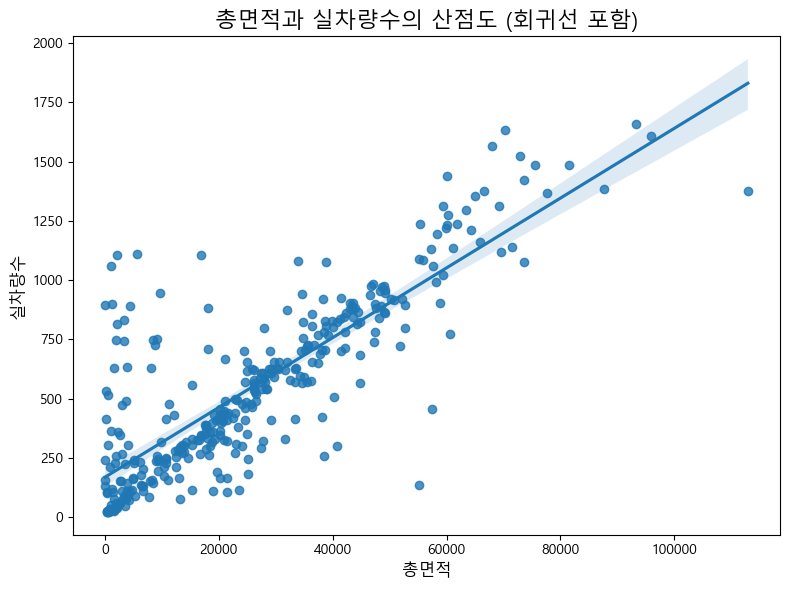

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# 임대료 vs 실차량수 산점도 + 회귀선 및 신뢰구간
plt.figure(figsize=(8, 6))
sns.regplot(x='임대료', y='실차량수', data=base_data, ci=95)  # ci=95는 95% 신뢰구간을 의미
plt.title('임대료와 실차량수의 산점도 (회귀선 포함)', fontsize=16)
plt.xlabel('임대료', fontsize=12)
plt.ylabel('실차량수', fontsize=12)
plt.tight_layout()
plt.show()

# 임대보증금 vs 실차량수 산점도 + 회귀선 및 신뢰구간
plt.figure(figsize=(8, 6))
sns.regplot(x='임대보증금', y='실차량수', data=base_data, ci=95)
plt.title('임대보증금과 실차량수의 산점도 (회귀선 포함)', fontsize=16)
plt.xlabel('임대보증금', fontsize=12)
plt.ylabel('실차량수', fontsize=12)
plt.tight_layout()
plt.show()

# 총면적 vs 실차량수 산점도 + 회귀선 및 신뢰구간
plt.figure(figsize=(8, 6))
sns.regplot(x='총면적', y='실차량수', data=base_data, ci=95)
plt.title('총면적과 실차량수의 산점도 (회귀선 포함)', fontsize=16)
plt.xlabel('총면적', fontsize=12)
plt.ylabel('실차량수', fontsize=12)
plt.tight_layout()
plt.show()


#### 2) 숫자형 feature --> 실차량수

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

import joblib

base_data = joblib.load(path+'result_df.pkl')

In [76]:
# 수치 -> 수치
def eda_2_nn(data, feature, target) :
    # 산점도
    temp = data.loc[data[feature].notnull()]
    sns.scatterplot( x= feature, y = target, data = temp)
    plt.grid()
    plt.show()
    
    # 상관분석
    result = spst.pearsonr(temp[feature], temp[target])
    print(f'상관계수 : {result[0]}, P-value : {result[1]}')
    

In [78]:
# 보증금 0인 행 확인
base_data.loc[ base_data['임대보증금']==0 ]

단지코드  총세대수    지역  준공연도 건물형태    난방방식 승강기설치여부  실차량수         총면적  10_30  \
6   C0008    86  부산울산  2011  계단식  개별가스난방  전체동 설치   892   4355.1684      0   
7   C0009    39  부산울산  2007  계단식  개별가스난방  전체동 설치   744   3301.6932      0   
8   C0010    26  부산울산  2012  계단식    지역난방  전체동 설치   363   1031.1652      0   
9   C0011    46  부산울산  2007  계단식  개별가스난방  전체동 설치   632   3909.0248      0   
13  C0015     5  대구경북  2007  계단식  개별가스난방  전체동 설치   100    408.7500      0   
14  C0016   114  대구경북  2010  계단식  개별가스난방  전체동 설치   946   9678.6942      0   
15  C0018     6  대구경북  2008  계단식  개별가스난방  전체동 설치   516    509.7762      0   
16  C0019    15  대구경북  2007  계단식  개별가스난방  전체동 설치   120   1271.1840      0   
17  C0020    11  대구경북  2008  계단식  개별가스난방  전체동 설치   211    934.6524      0   
18  C0021    14  대구경북  2008  계단식  개별가스난방  전체동 설치   899   1189.5246      0   
19  C0022    23  대구경북  2007  계단식  개별가스난방  전체동 설치   746   1953.3430      0   
20  C0023    16    경기  2009  계단식     NaN  전체동 설치  1061   1030.8528      0   
23  C0026    36    경기  2009  계단식    지역난방  전체동 설치  1107   2159.9640      0   
26  C0029    95  부산울산  2007  계단식  개별가스난방  전체동 설치   630   8074.1451      0   
28  C0031   204    경기  2011  계단식    지역난방  전체동 설치  1107  16891.3800      0   
29  C0032   164    경기  2011  계단식    지역난방  전체동 설치  1212  64338.3600      0   
40  C0044     2    서울  2008  혼합식  개별가스난방  전체동 설치   158    119.9816      0   
42  C0047   101    경기  2009  혼합식  지역가스난방  전체동 설치   747   8483.2600      0   
48  C0053   307    경기  2011  계단식  지역가스난방  전체동 설치   618  25044.2100      0   
49  C0054   461    경기  2011  계단식  지역가스난방  전체동 설치  1077  38910.1400      0   
50  C0056    48    경기  2009  계단식    지역난방  전체동 설치   491   3707.0400      0   
58  C0064    31  대전충남  2006  계단식  개별가스난방  전체동 설치   154   2622.0451      0   
60  C0066   475  대전충남  2011  계단식  개별가스난방  전체동 설치   506  40223.6650      0   
61  C0067   127  대전충남  2007  계단식  개별가스난방  전체동 설치   412  10791.4567      0   
62  C0068   715  광주전남  2004  계단식  개별가스난방  전체동 설치   774  60541.6955      0   
63  C0069     1  광주전남  2005  계단식  개별가스난방  전체동 설치   895     84.9668      0   
65  C0071    67  광주전남  2001  계단식  개별가스난방  전체동 설치  1112   5678.9200      0   
66  C0074    34  대구경북  2008  혼합식  개별가스난방  전체동 설치   153   2883.5502      0   
67  C0075    20  대구경북  2008  계단식  개별가스난방  전체동 설치    27   1698.1040      0   
69  C0077    31  대구경북  2000  복도식  개별가스난방  전체동 설치    38   1933.5196      0   
70  C0078    32  대구경북  2008  계단식  개별가스난방  전체동 설치   348   2703.3344      0   
71  C0079    58  대구경북  2007  계단식  개별가스난방  전체동 설치   160   4911.5792      0   
72  C0080    32  대구경북  2015  계단식  개별가스난방  전체동 설치    58   2697.5200      0   
76  C0086    48    경남  2009  계단식  지역가스난방  전체동 설치   305   4079.5464      0   
78  C0088   126    제주  2010  복도식  개별가스난방  전체동 설치   246  10688.7900      0   
99  C0109   489    경기  1999  복도식  지역유류난방  전체동 설치   301  24048.9400      0   

    30_40  40_50  50_60  over_60  임대보증금  임대료  
6      40      0     46        0    0.0  0.0  
7       0      0      0       39    0.0  0.0  
8      26      0      0        0    0.0  0.0  
9       0      0      0       46    0.0  0.0  
13      0      0      0        5    0.0  0.0  
14      0      0      0      114    0.0  0.0  
15      0      0      0        6    0.0  0.0  
16      0      0      0       15    0.0  0.0  
17      0      0      0       11    0.0  0.0  
18      0      0      0       14    0.0  0.0  
19      0      0      0       23    0.0  0.0  
20      0      6      4        6    0.0  0.0  
23      0      0     36        0    0.0  0.0  
26      0      0      0       95    0.0  0.0  
28      0      0      0      204    0.0  0.0  
29      0      0      0      792    0.0  0.0  
40      0      0      2        0    0.0  0.0  
42      0      0      0      101    0.0  0.0  
48      0      0      0      307    0.0  0.0  
49      0      0      0      461    0.0  0.0  
50      0      0      0       48    0.0  0.0  
58      0      0      0       31    0.0  0.0  
60      0      0      0      475    0.0  0.0  
61      0      0      0    

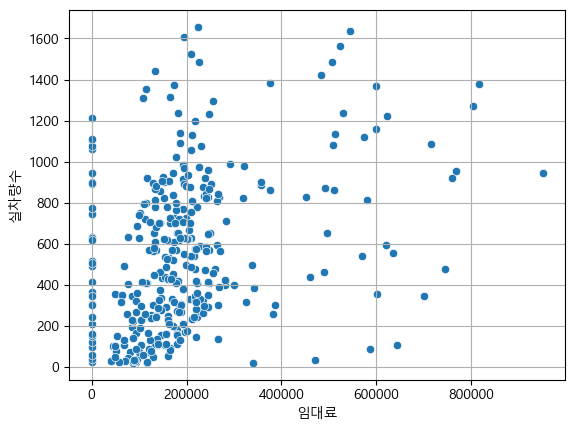

상관계수 : 0.3370663041695958, P-value : 1.301037586089997e-10


In [80]:
# 보증금 0인 행 제외 안한채로 분석
eda_2_nn(base_data, '임대료', '실차량수')

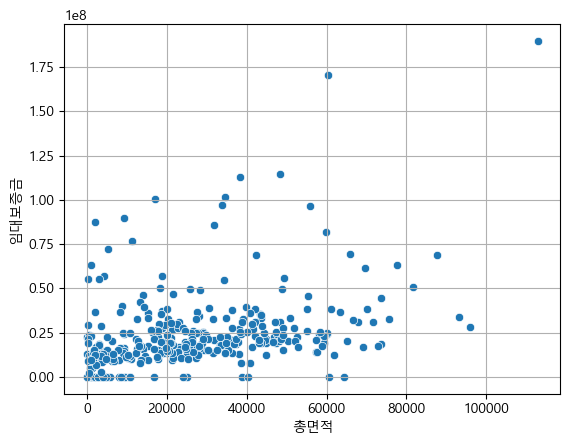

상관계수 : 0.38759628045204764, P-value : 8.200830179544537e-14


In [81]:
# 보증금 0인 행 제외 안한채로 분석
eda_2_nn(base_data, '총면적', '임대보증금')

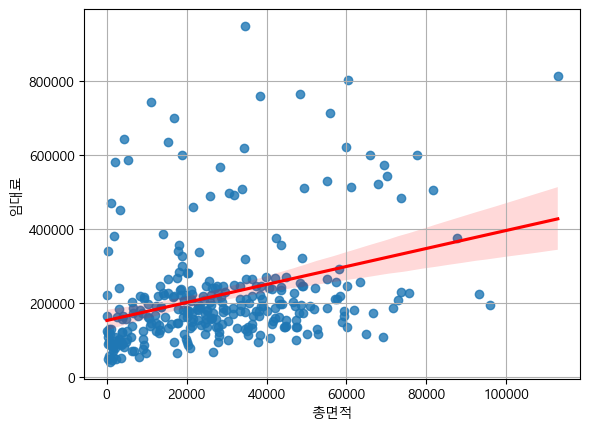

상관계수 : 0.3326608003926378, P-value : 2.027877026658571e-09
회귀선 방정식: y = 2.4395325708367324x + 152007.01419369323
기울기(slope): 2.4395325708367324, 절편(intercept): 152007.01419369323


In [82]:
# 수치 -> 수치 / 타겟값 0인 행은 제외
def eda_2_nn2(data, feature, target):
    # 0이 아닌 target 값을 포함하고 결측값을 제외한 데이터를 필터링
    temp = data.loc[(data[feature].notnull()) & (data[target] != 0)]
    
    # 산점도와 선형 회귀선 추가 (regplot 사용)
    sns.regplot(x=feature, y=target, data=temp, line_kws={"color":"red"})  # 회귀선을 빨간색으로 추가
    plt.grid()
    plt.show()
    
    # 상관분석
    result = spst.pearsonr(temp[feature], temp[target])
    print(f'상관계수 : {result[0]}, P-value : {result[1]}')
    
    # 회귀선 계산 (기울기와 절편 구하기)
    slope, intercept, r_value, p_value, std_err = spst.linregress(temp[feature], temp[target])
    print(f"회귀선 방정식: y = {slope}x + {intercept}")
    print(f"기울기(slope): {slope}, 절편(intercept): {intercept}")

# 함수 호출 예시 (데이터와 열 이름이 '총면적'과 '임대료'일 경우)
eda_2_nn2(base_data, '총면적', '임대료')

#### 위에서 구한 회귀선 식을 바탕으로 임대료, 보증금 결측치에 비례값 대입.

In [85]:
base_data.loc[base_data['임대보증금'] == 0, '임대보증금'] = 360.4968512810463 * base_data['총면적'] + 16442735.370219937
base_data.loc[base_data['임대료'] == 0, '임대료'] = 2.4395325708367324 * base_data['총면적'] + 152007.01419369323
base_data.head(10)

단지코드  총세대수    지역  준공연도 건물형태    난방방식 승강기설치여부  실차량수         총면적  10_30  \
0  C0001    78    서울  2013  계단식  개별가스난방  전체동 설치   109   4393.1400      0   
1  C0002    35    서울  2013  복도식  개별가스난방  전체동 설치    35    983.2200     35   
2  C0003    88    서울  2013  계단식  개별가스난방  전체동 설치    88   5244.6900      0   
3  C0004   477    서울  2014  복도식    지역난방  전체동 설치   943  34607.3400      0   
4  C0006    15    서울  2013  복도식  개별가스난방  전체동 설치    21    309.5000     15   
5  C0007    69  부산울산  2014  계단식  개별가스난방  전체동 설치   830   3438.2532      0   
6  C0008    86  부산울산  2011  계단식  개별가스난방  전체동 설치   892   4355.1684      0   
7  C0009    39  부산울산  2007  계단식  개별가스난방  전체동 설치   744   3301.6932      0   
8  C0010    26  부산울산  2012  계단식    지역난방  전체동 설치   363   1031.1652      0   
9  C0011    46  부산울산  2007  계단식  개별가스난방  전체동 설치   632   3909.0248      0   

   30_40  40_50  50_60  over_60         임대보증금            임대료  
0      0      0     78        0  5.696200e+07  642930.000000  
1      0      0      0        0  6.306200e+07  470100.000000  
2      0      0     88        0  7.219000e+07  586540.000000  
3      0      0    150      327  1.015167e+08  950305.000000  
4      0      0      0        0  5.522750e+07  340148.333333  
5     26      0     43        0  2.878033e+07  450920.000000  
6     40      0     46        0  1.801276e+07  162631.589357  
7      0      0      0       39  1.763299e+07  160061.602294  
8     26      0      0        0  1.681447e+07  154522.575285  
9      0      0      0       46  1.785193e+07  161543.207514

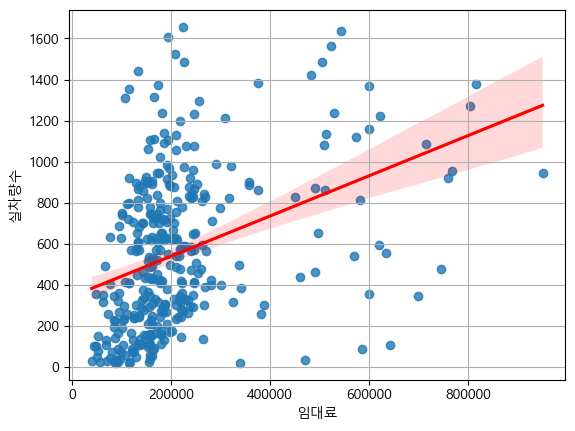

상관계수 : 0.3785470624435071, P-value : 3.3802439362861207e-13
회귀선 방정식: y = 0.0009792650092789168x + 343.68796004798605
기울기(slope): 0.0009792650092789168, 절편(intercept): 343.68796004798605


In [87]:
# 보증금 0인 곳에 비례값 대입한 이후 분석
eda_2_nn2(base_data, '임대료', '실차량수')

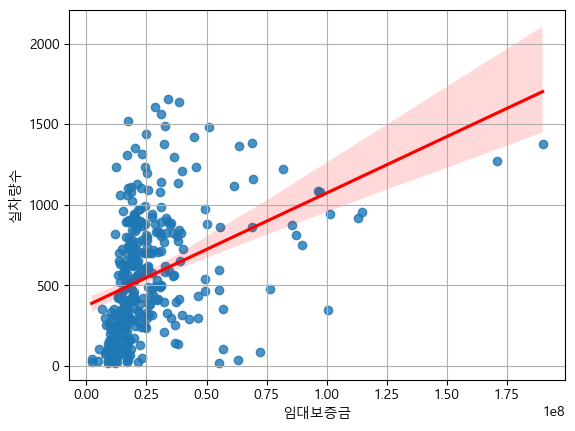

상관계수 : 0.3944920254120732, P-value : 2.7056003082854102e-14
회귀선 방정식: y = 6.997163611467949e-06x + 373.976057381079
기울기(slope): 6.997163611467949e-06, 절편(intercept): 373.976057381079


In [88]:
# 보증금 0인 곳에 비례값 대입한 이후 분석
eda_2_nn2(base_data, '임대보증금', '실차량수')

### 임대료와 실차량수의 상관관계가 존재하는 것으로 판단되지만, 그래프를 보았을땐 선형성이 아닌 것으로 판단된다. 따라서 비선형상관분석등 추가적인 분석이 필요할 것으로 판단된다.

In [91]:
# 가중평균 계산치를 불러옴
data2 = joblib.load('gavg.pkl')
data2['단지별면적평균'] = data2['전용면적'] + data2['공급면적(공용)']

In [93]:
# 가중평균 계산치에서 '단지별면적평균'만 불러옴 / 단지코드 포함
columns = [ '단지별세대수', '전용면적', '공급면적(공용)',	'임대보증금', '임대료' ]
data4 = data2.drop(columns=columns)
data4

단지코드    단지별면적평균
0    C0001  77.227799
1    C0002  44.833337
2    C0003  81.592495
3    C0004  98.656032
4    C0006  36.201787
..     ...        ...
340  C1341  36.738671
341  C1354  41.570570
342  C2307  38.802847
343  C2343  41.062200
344  C2349  38.781000

[345 rows x 2 columns]

In [94]:
# 가중평균 계산치에서 '공급면적(공용)'만 불러옴 / 단지코드 포함
columns = [ '단지별세대수', '전용면적', '임대보증금', '임대료', '단지별면적평균' ]
data3 = data2.drop(columns=columns)
data3

단지코드   공급면적(공용)
0    C0001  20.905491
1    C0002  16.741337
2    C0003  21.993745
3    C0004  26.103957
4    C0006  15.568453
..     ...        ...
340  C1341  12.009671
341  C1354  13.812843
342  C2307  13.934071
343  C2343  16.322200
344  C2349  13.811000

[345 rows x 2 columns]

In [95]:
# need = 베이스데이터에 공급면적(공용) 추가
need = pd.merge(base_data, data3, how='left', on='단지코드')
need

단지코드  총세대수    지역  준공연도 건물형태    난방방식 승강기설치여부  실차량수       총면적  10_30  \
0    C0001    78    서울  2013  계단식  개별가스난방  전체동 설치   109   4393.14      0   
1    C0002    35    서울  2013  복도식  개별가스난방  전체동 설치    35    983.22     35   
2    C0003    88    서울  2013  계단식  개별가스난방  전체동 설치    88   5244.69      0   
3    C0004   477    서울  2014  복도식    지역난방  전체동 설치   943  34607.34      0   
4    C0006    15    서울  2013  복도식  개별가스난방  전체동 설치    21    309.50     15   
..     ...   ...   ...   ...  ...     ...     ...   ...       ...    ...   
340  C0354  1485  대전충남  1993  복도식    중앙난방  전체동 설치   298  40792.77   1181   
341  C1354  1386  대전충남  1993  복도식  중앙가스난방  전체동 설치   258  38472.21   1071   
342  C0356   956    경기  1994  복도식  지역가스난방  전체동 설치   243  25209.72    956   
343  C0358   120    강원  2020  복도식     NaN  전체동 설치    47   3466.14     66   
344  C0359   447  대구경북  1994  복도식  중앙유류난방  전체동 설치    78  13262.49    149   

     30_40  40_50  50_60  over_60         임대보증금            임대료   공급면적(공용)  
0        0      0     78        0  5.696200e+07  642930.000000  20.905491  
1        0      0      0        0  6.306200e+07  470100.000000  16.741337  
2        0      0     88        0  7.219000e+07  586540.000000  21.993745  
3        0      0    150      327  1.015167e+08  950305.000000  26.103957  
4        0      0      0        0  5.522750e+07  340148.333333  15.568453  
..     ...    ...    ...      ...           ...            ...        ...  
340    298      0      6        0  7.595571e+06  104975.714286  16.046788  
341    298      0     17        0  8.092875e+06  111848.750000  13.812843  
342      0      0      0        0  9.931000e+06  134540.000000  12.750000  
343     54      0      0        0  2.515500e+06   50040.000000  17.630520  
344    298      0      0        0  7.628000e+06  125010.000000  13.693333  

[345 rows x 17 columns]

In [102]:
# 공용면적 당 임대료, 보증금 계산
need['공용당임대료'] = need['임대료'] / need['공급면적(공용)']
need['공용당보증금'] = need['임대보증금'] / need['공급면적(공용)']

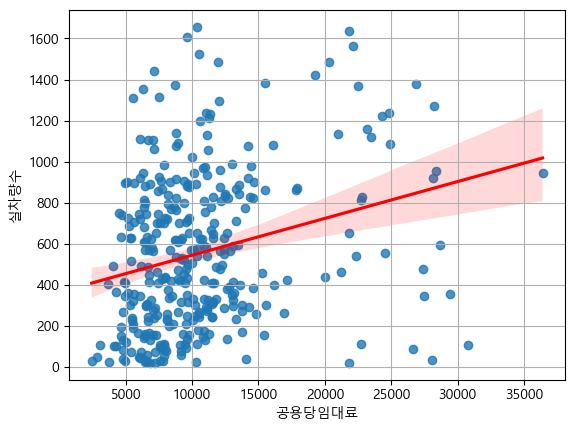

상관계수 : 0.26343840392134193, P-value : 6.929158179316578e-07
회귀선 방정식: y = 0.017929054357606906x + 365.15673620771065
기울기(slope): 0.017929054357606906, 절편(intercept): 365.15673620771065


In [104]:
eda_2_nn2(need, '공용당임대료', '실차량수')

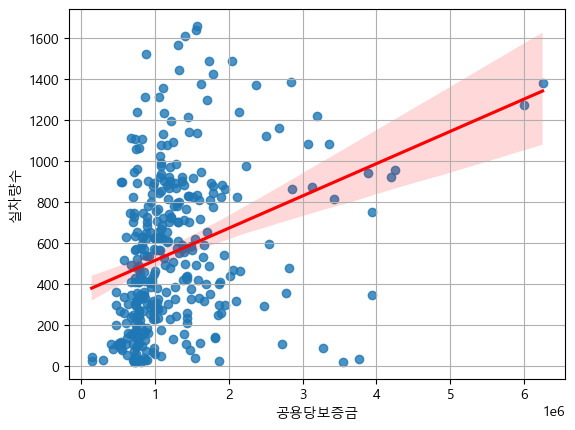

상관계수 : 0.3213965060423577, P-value : 9.90750410569922e-10
회귀선 방정식: y = 0.00015718643393286013x + 357.8360582013345
기울기(slope): 0.00015718643393286013, 절편(intercept): 357.8360582013345


In [105]:
eda_2_nn2(need, '공용당보증금', '실차량수')

### 공용면적당 보증금과 임대료가 실차량수와 관계가 있지만 해당 변수들로만 이용한 분석이 부족한것으로 판단되어 공급면적(단지별면적)을 이용해서 추가적인 분석을 진행함.


In [108]:
need = pd.merge(need, data4, how='left', on='단지코드')
need

단지코드  총세대수    지역  준공연도 건물형태    난방방식 승강기설치여부  실차량수       총면적  10_30  \
0    C0001    78    서울  2013  계단식  개별가스난방  전체동 설치   109   4393.14      0   
1    C0002    35    서울  2013  복도식  개별가스난방  전체동 설치    35    983.22     35   
2    C0003    88    서울  2013  계단식  개별가스난방  전체동 설치    88   5244.69      0   
3    C0004   477    서울  2014  복도식    지역난방  전체동 설치   943  34607.34      0   
4    C0006    15    서울  2013  복도식  개별가스난방  전체동 설치    21    309.50     15   
..     ...   ...   ...   ...  ...     ...     ...   ...       ...    ...   
340  C0354  1485  대전충남  1993  복도식    중앙난방  전체동 설치   298  40792.77   1181   
341  C1354  1386  대전충남  1993  복도식  중앙가스난방  전체동 설치   258  38472.21   1071   
342  C0356   956    경기  1994  복도식  지역가스난방  전체동 설치   243  25209.72    956   
343  C0358   120    강원  2020  복도식     NaN  전체동 설치    47   3466.14     66   
344  C0359   447  대구경북  1994  복도식  중앙유류난방  전체동 설치    78  13262.49    149   

     30_40  40_50  50_60  over_60         임대보증금            임대료   공급면적(공용)  \
0        0      0     78        0  5.696200e+07  642930.000000  20.905491   
1        0      0      0        0  6.306200e+07  470100.000000  16.741337   
2        0      0     88        0  7.219000e+07  586540.000000  21.993745   
3        0      0    150      327  1.015167e+08  950305.000000  26.103957   
4        0      0      0        0  5.522750e+07  340148.333333  15.568453   
..     ...    ...    ...      ...           ...            ...        ...   
340    298      0      6        0  7.595571e+06  104975.714286  16.046788   
341    298      0     17        0  8.092875e+06  111848.750000  13.812843   
342      0      0      0        0  9.931000e+06  134540.000000  12.750000   
343     54      0      0        0  2.515500e+06   50040.000000  17.630520   
344    298      0      0        0  7.628000e+06  125010.000000  13.693333   

           공용당임대료        공용당보증금    단지별면적평균  
0    30754.120973  2.724739e+06  77.227799  
1    28080.194311  3.766844e+06  44.833337  
2    26668.490877  3.282297e+06  81.592495  
3    36404.634532  3.888938e+06  98.656032  
4    21848.562991  3.547398e+06  36.201787  
..            ...           ...        ...  
340   6541.852181  4.733391e+05  43.516667  
341   8097.446147  5.858950e+05  41.570570  
342  10552.156863  7.789020e+05  39.120000  
343   2838.260017  1.426787e+05  46.515020  
344   9129.259981  5.570594e+05  43.363333  

[345 rows x 20 columns]

In [109]:
# 단위면적당 임대비용 계산
need['면적당임대비용'] = (need['임대료'] + need['임대보증금']) / need['단지별면적평균']

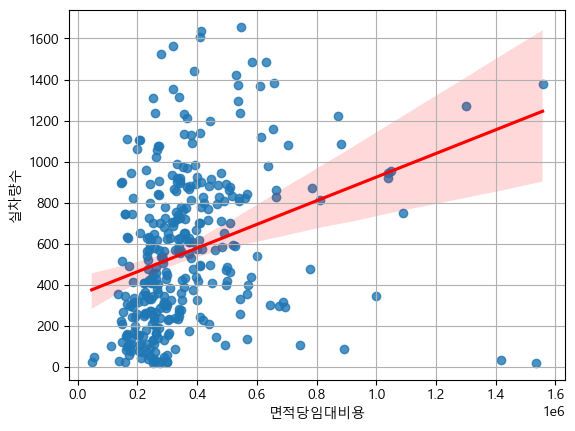

상관계수 : 0.31483757722554306, P-value : 2.240132445821481e-09
회귀선 방정식: y = 0.0005759744626629417x + 348.89103533635404
기울기(slope): 0.0005759744626629417, 절편(intercept): 348.89103533635404


In [110]:
eda_2_nn2(need, '면적당임대비용', '실차량수')

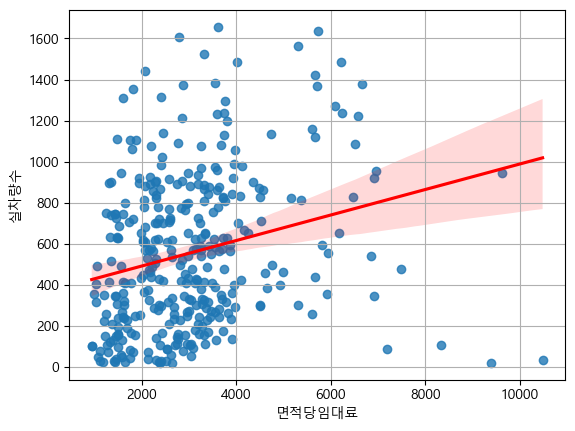

상관계수 : 0.24586107847798103, P-value : 3.81492178720582e-06
회귀선 방정식: y = 0.06207942883325124x + 367.65747767297717
기울기(slope): 0.06207942883325124, 절편(intercept): 367.65747767297717


In [112]:
need['면적당임대료'] = need['임대료'] / need['단지별면적평균']
eda_2_nn2(need, '면적당임대료', '실차량수')

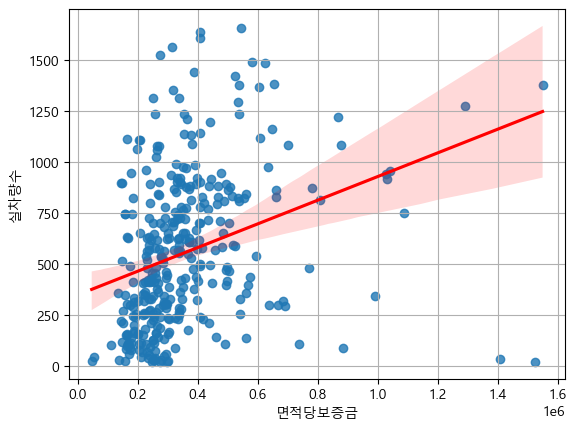

상관계수 : 0.31474709020009767, P-value : 2.2651758068233717e-09
회귀선 방정식: y = 0.0005789189461796315x + 349.5862437743853
기울기(slope): 0.0005789189461796315, 절편(intercept): 349.5862437743853


In [115]:
need['면적당보증금'] = need['임대보증금'] / need['단지별면적평균']
eda_2_nn2(need, '면적당보증금', '실차량수')

### 해당 분석 또한 선형분석이 부적합한 것으로 판단되기 때문에 비선형적인 방법을 모색할 필요가 있다.

#### 3) 범주형 feature --> 실차량수

##### 3-1) 지역에 따른 실차량수 분석

F_onewayResult(statistic=4.451857733965143, pvalue=2.8660069638343555e-06)


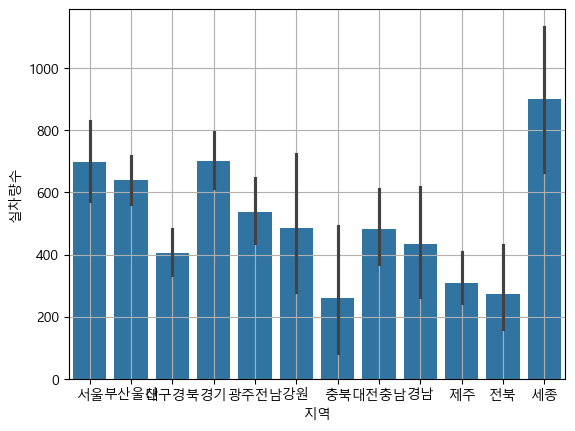

In [120]:
eda_2_cn(base_data, '지역', '실차량수')
# 지역에 따른 실차량수의 차이가 존재한다. 
# 이때 수도권 지역과 비수도권 지역과 구분하여 추가적인 분석을 진행해보겠다.

In [121]:
base_data['수도권_비수도권'] = np.where(base_data['지역'].isin(['경기', '서울', '세종']), '수도권', '비수도권')


TtestResult(statistic=5.4109160950015305, pvalue=1.1793757018897295e-07, df=343.0)


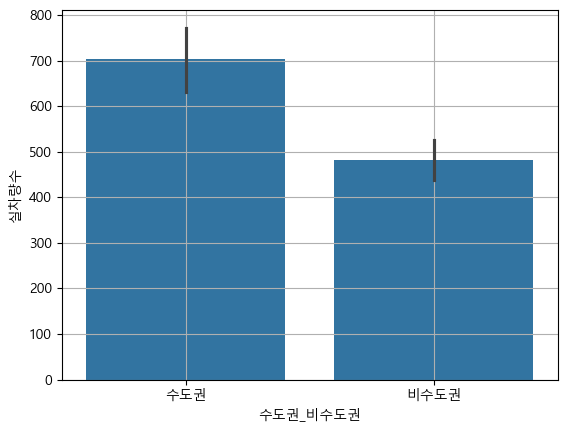

In [123]:
eda_2_cn(base_data, '수도권_비수도권', '실차량수')
# 수도권인지 아닌지가 실차량수에 유의미한 영향을 미친다.
# 비수도권 중 특히 대구, 충북, 제주, 전북의 실차량수와 수도권의 실차량수는 차이가 크다.

## 3.전처리_추가

* **세부요구사항**
    * 다음 사항은 선택 사항입니다.
        * 난방방식, 승강기설치여부 두 변수에 대해서 적은 수의 범주를 묶는 작업을 시도하시오.
        * 지역 : 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 삭제 합니다.

### 1) 승강기 설치 여부와 실차량수 분석

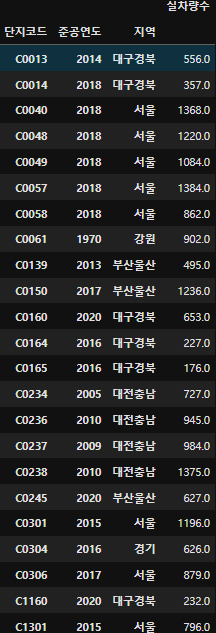

In [128]:
# https://www.law.go.kr/법령/건축물의설비기준등에관한규칙
# 건축법 1996. 2. 9 시행
# 건축법 시행령 제64조: 6층 이상 건물에 승강기 1대 이상 설치되어야 한다.
base_data.loc[base_data['단지코드'] == 'C0061', '승강기설치여부'] = '미설치'
base_data['승강기설치여부'] = base_data['승강기설치여부'].fillna('전체동 설치')

 <<<  승강기설치여부   >>


Class  Count      Prop
0  전체동 설치    332  0.962319
1     미설치     11  0.031884
2  일부동 설치      2  0.005797

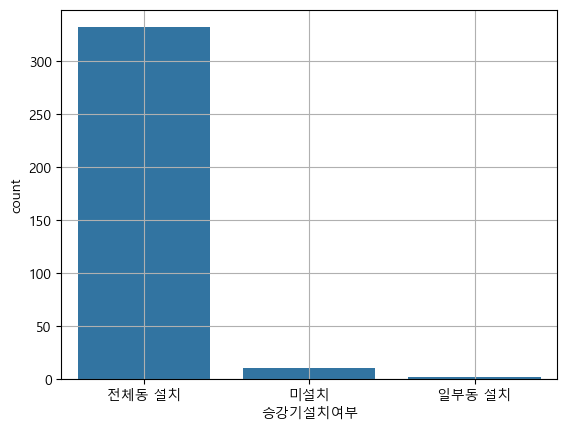

In [129]:
eda_1_c(base_data, '승강기설치여부')

F_onewayResult(statistic=4.857340564648052, pvalue=0.008315515483264582)


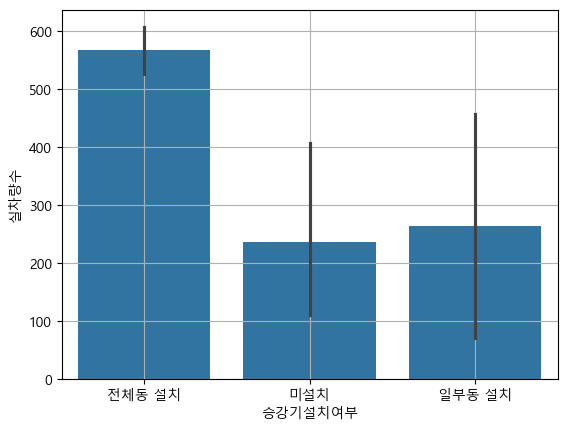

In [130]:
eda_2_cn(base_data, '승강기설치여부', '실차량수')
## 설치여부에 따른 차이가 유의미하게 나왔다 -> 전체동과 그외의 요인들을 통해 추가 분석을 진행하겠다.

TtestResult(statistic=3.1198714618980885, pvalue=0.001962697650849843, df=343.0)


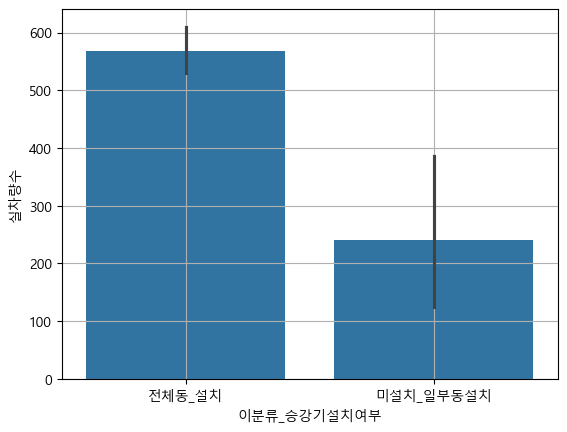

In [131]:
base_data['이분류_승강기설치여부'] = np.where(base_data['승강기설치여부'] == '전체동 설치', '전체동_설치', '미설치_일부동설치')
eda_2_cn(base_data, '이분류_승강기설치여부', '실차량수')

### 2) 건물형태와 실차량수 분석

 <<<  건물형태   >>


Class  Count      Prop
0   복도식    194  0.562319
1   계단식     99  0.286957
2   혼합식     46  0.133333

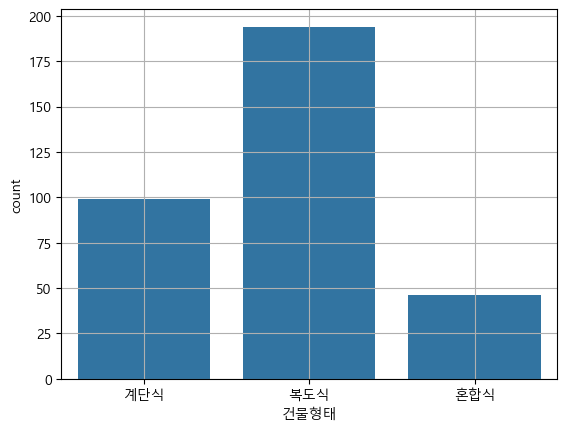

In [135]:
eda_1_c(base_data, '건물형태')

In [136]:
# 결측값 제거한 후에 그룹화
data_cleaned = base_data.dropna(subset=['준공연도', '건물형태'])

# 건물형태별로 준공연도 데이터를 그룹화
grouped_data = [data_cleaned[data_cleaned['건물형태'] == building_type]['준공연도'] 
                for building_type in data_cleaned['건물형태'].unique()]

# 그룹별 데이터 크기 확인
for i, group in enumerate(grouped_data):
    print(f"'{data_cleaned['건물형태'].unique()[i]}' 그룹의 데이터 수: {len(group)}")

import scipy.stats as spst

# 그룹들 간 ANOVA 분석 수행
f_stat, p_value = spst.f_oneway(*grouped_data)

# 결과 출력
print(f"F-통계량: {f_stat}")
print(f"p-값: {p_value}")

if p_value < 0.05:
    print("건물형태에 따른 준공연도의 차이가 유의미하게 존재합니다.")
else:
    print("건물형태에 따른 준공연도의 차이가 유의미하지 않습니다.")

# null값을 제외한 건물형태에 따른 준공연도 차이분석

'계단식' 그룹의 데이터 수: 99
'복도식' 그룹의 데이터 수: 194
'혼합식' 그룹의 데이터 수: 46
F-통계량: 2.13733239763223
p-값: 0.11957029737346858
건물형태에 따른 준공연도의 차이가 유의미하지 않습니다.


In [137]:
base_data_no = base_data.loc[base_data['건물형태'].isna()]
base_data_no[['준공연도', '건물형태','지역']]
# 건물형태가 Nan인 값이 준공연도가 최근이지만, 준공연도에 따른 건물형태의 차이가 존재하지 않기 떄문에 최빈값으로 해결함.

준공연도 건물형태  지역
22   2017  NaN  경기
51   2018  NaN  서울
52   2018  NaN  서울
248  2017  NaN  경기
249  2017  NaN  경기
283  2016  NaN  경기

In [139]:
base_data['건물형태']= base_data['건물형태'].fillna('복도식')
base_data['건물형태'].isna().sum()
# 차이가 존재하지 않음 => 최빈값(복도식)으로 결측치 해결함

0

F_onewayResult(statistic=6.07632088862142, pvalue=0.002552061140492482)


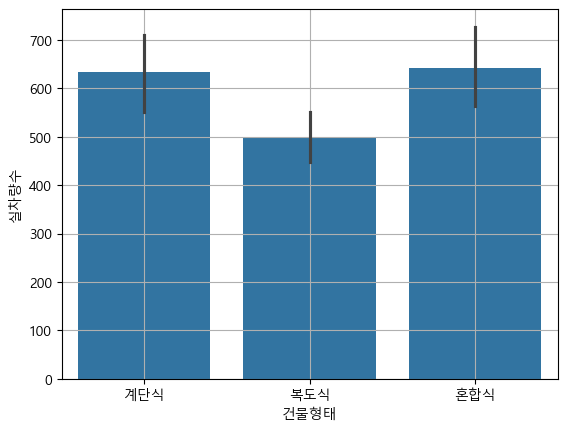

In [140]:
eda_2_cn(base_data, '건물형태','실차량수')
## 건물형태에 따른 실차량수가 유의미하게 차이가 있다.

### 3) 난방방식와 실차량수 분석

In [143]:
# 난방방식 분류 함수 (개별, 지역, 중앙) 분류
def classify_heating(heating_type): 
    if pd.isna(heating_type): 
        return 'null' 
    elif '개별' in heating_type: 
        return '개별난방'
    elif '지역' in heating_type: 
        return '지역난방' 
    else: 
        return '중앙난방' 
# 난방방식 분류 적용 
base_data['분류된_난방방식'] = base_data['난방방식'].apply(classify_heating) 
# null 값 처리 (예시: '기타'로 대체) 
base_data['분류된_난방방식'] = base_data['분류된_난방방식'].fillna('기타') 
base_data.head()

단지코드  총세대수  지역  준공연도 건물형태    난방방식 승강기설치여부  실차량수       총면적  10_30  30_40  \
0  C0001    78  서울  2013  계단식  개별가스난방  전체동 설치   109   4393.14      0      0   
1  C0002    35  서울  2013  복도식  개별가스난방  전체동 설치    35    983.22     35      0   
2  C0003    88  서울  2013  계단식  개별가스난방  전체동 설치    88   5244.69      0      0   
3  C0004   477  서울  2014  복도식    지역난방  전체동 설치   943  34607.34      0      0   
4  C0006    15  서울  2013  복도식  개별가스난방  전체동 설치    21    309.50     15      0   

   40_50  50_60  over_60         임대보증금            임대료 수도권_비수도권 이분류_승강기설치여부  \
0      0     78        0  5.696200e+07  642930.000000      수도권      전체동_설치   
1      0      0        0  6.306200e+07  470100.000000      수도권      전체동_설치   
2      0     88        0  7.219000e+07  586540.000000      수도권      전체동_설치   
3      0    150      327  1.015167e+08  950305.000000      수도권      전체동_설치   
4      0      0        0  5.522750e+07  340148.333333      수도권      전체동_설치   

  분류된_난방방식  
0     개별난방  
1     개별난방  
2     개별난방  
3     지역난방  
4     개별난방

In [145]:
base_data['분류된_난방방식'].value_counts()
 
base_data.groupby(by='분류된_난방방식', as_index=False)[['준공연도']].mean()

분류된_난방방식         준공연도
0     null  2012.769231
1     개별난방  2006.491892
2     중앙난방  1995.789474
3     지역난방  2010.008696

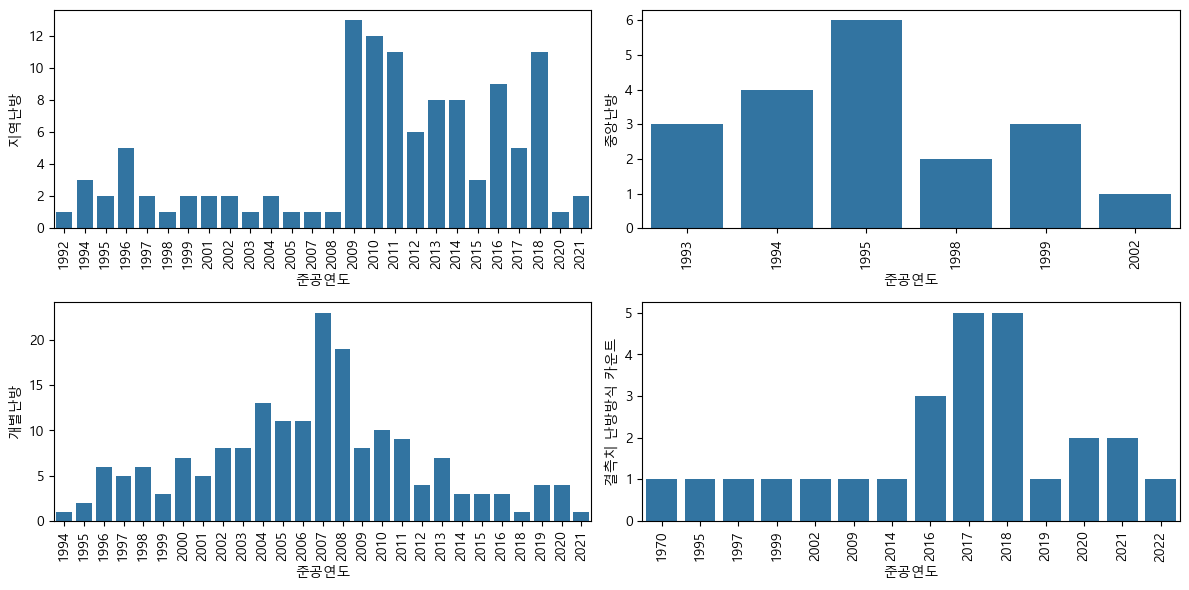

In [146]:
# '개별난방'인 데이터만 필터링
filtered_data = base_data[base_data['분류된_난방방식'] == '지역난방']
count_data = filtered_data.groupby('준공연도').size().reset_index(name='난방방식_카운트')
 
filtered_data1 = base_data[base_data['분류된_난방방식'] == '중앙난방']
count_data1 = filtered_data1.groupby('준공연도').size().reset_index(name='난방방식_카운트')
 
filtered_data2 = base_data[base_data['분류된_난방방식'] == '개별난방']
count_data2 = filtered_data2.groupby('준공연도').size().reset_index(name='난방방식_카운트')
 
filtered_data_n = base_data[base_data['분류된_난방방식'] == 'null']
count_data_n = filtered_data_n.groupby('준공연도').size().reset_index(name='난방방식_카운트')
 
plt.figure(figsize=(12, 6))
plt.subplot(2,2,1)
sns.barplot(x='준공연도', y='난방방식_카운트', data=count_data)
plt.xticks(rotation=90)  
plt.ylabel('지역난방')
 
plt.subplot(2,2,2)
sns.barplot(x='준공연도', y='난방방식_카운트', data=count_data1)
plt.xticks(rotation=90)  
plt.ylabel('중앙난방')
 
plt.subplot(2,2,3)
sns.barplot(x='준공연도', y='난방방식_카운트', data=count_data2)
plt.xticks(rotation=90)
plt.ylabel('개별난방')
plt.tight_layout()
 
 
plt.subplot(2,2,4)
sns.barplot(x='준공연도', y='난방방식_카운트', data=count_data_n)
plt.ylabel('결측치 난방방식 카운트')
plt.xticks(rotation=90)  
plt.show()

# 해당 그래프를 통해 준공연도에 따른 난방방식의 차이가 존재하는 걸로 생각됨, 
# -> 그래프를 기준으로 2000년 이전에는 중앙난방, 2000~ 2009사이는 개별난방, 2010~는 지역난방으로 결측치 처리를 함.

In [148]:
# 결측치 처리
base_data.loc[(base_data['분류된_난방방식']=='null') & ( base_data['준공연도'] < 2000), '분류된_난방방식'] = '중앙난방'
base_data.loc[(base_data['분류된_난방방식']=='null') & (2000 <= base_data['준공연도']) & (base_data['준공연도'] < 2009), '분류된_난방방식'] = '개별난방'
base_data.loc[(base_data['분류된_난방방식']=='null') & (2009 <= base_data['준공연도']), '분류된_난방방식'] = '지역난방'

 <<<  분류된_난방방식   >>


Class  Count      Prop
0  개별난방    186  0.539130
1  지역난방    136  0.394203
2  중앙난방     23  0.066667

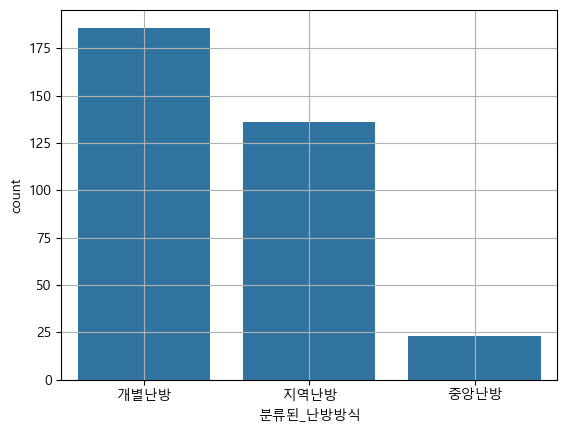

In [150]:
eda_1_c(base_data, '분류된_난방방식')

F_onewayResult(statistic=23.74930386642226, pvalue=2.1976250176889464e-10)


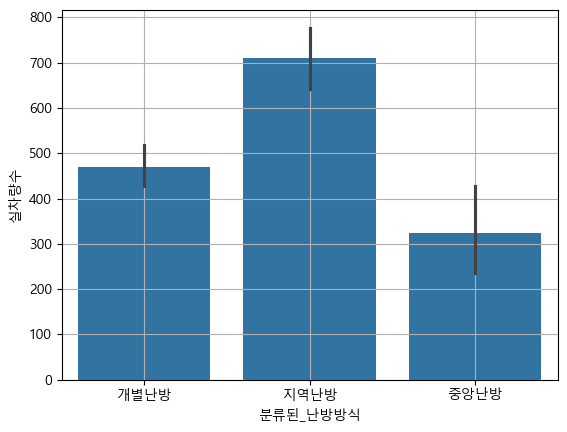

In [151]:
eda_2_cn(base_data,'분류된_난방방식','실차량수')

# 난방방식에 따른 실차량수 차이가 존재한다.
# 사후분석을 통해 차이를 파악해야하지만 그래프를 보았을 땐, 지역난방 > 개별 난방 > 중앙난방 순으로 실차량수가 큰것으로 예상된다.

## 4.요인 정리
* 실차량수(Target)에 영향을 미치는 요인에 대해서, 다음의 3 그룹으로 정리합시다.
    * 강한 관계 : ['건물형태', '난방방식', '승강기 설치여부', '지역', '지역별 차량 1대 전용면적', '공급면적']
    * 약한 관계 : ['임대료', '임대보증금']
    * 관계 없음 : 